In [14]:
import os
import numpy as np

from pycocotools.coco import COCO
from skimage import io
import matplotlib.pyplot as plt

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


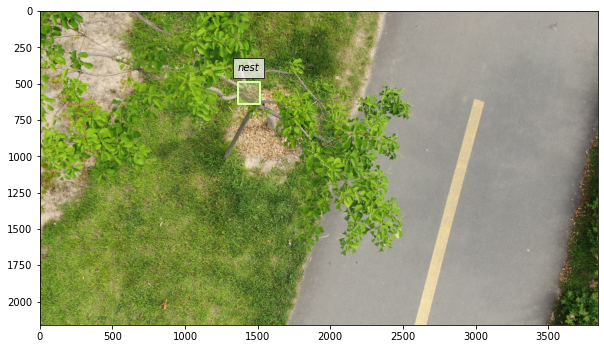

In [16]:
path = os.path.expanduser("~/Desktop/joo/data/nest/origin/val/JPEGImages/WN09_009.jpg")
annFile = "../../runs/annotations/instance_val2022.json"

coco=COCO(annFile)

catIds = coco.getCatIds(catNms=['nest'])
imgIds = coco.getImgIds(catIds=catIds )
imgIds = coco.getImgIds(imgIds = imgIds[0])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(path)

fig, ax = plt.subplots(figsize=(10, 8))

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

ax.imshow(I)
coco.showAnns(anns, draw_bbox=True)

for i, ann in enumerate(anns):
    ax.text(anns[i]['bbox'][0], anns[i]['bbox'][1]-80, 'nest', style='italic', 
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5})